# Import

In [4]:
import os
import urllib
import tarfile

import pickle
import matplotlib.pyplot as plt

# Téléchargement Jeu de Données

In [5]:
if not os.path.exists('DatasetCIFAR10'):

    print("Téléchargement du jeu de données CIFAR-10...")
    url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    urllib.request.urlretrieve(url, 'cifar-10-python.tar.gz')

    print("Extraction du jeu de données CIFAR-10...")
    with tarfile.open('cifar-10-python.tar.gz', 'r:gz') as tar:
        tar.extractall()

    print("Jeu de données téléchargé et extrait.")

    os.rename('cifar-10-batches-py', 'DatasetCIFAR10')

    os.remove('cifar-10-python.tar.gz')

else:
    print("Le jeu de données CIFAR-10 est déjà présent.")

Le jeu de données CIFAR-10 est déjà présent.


# Visualisation

In [6]:
# Fonction pour charger un fichier de batch CIFAR-10
def load_cifar10_batch(filepath):
    with open(filepath, 'rb') as file:
        data_dict = pickle.load(file, encoding='bytes')

        images = data_dict[b'data']
        labels = data_dict[b'labels']

        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Redimensionner les images
        
        return images, labels

# Charger les noms des classes
def load_cifar10_meta(filepath):
    with open(filepath, 'rb') as file:
        meta_dict = pickle.load(file, encoding='bytes')
        return [label.decode('utf-8') for label in meta_dict[b'label_names']]

In [8]:
# Charger les données d'un batch
dataset_path = "DatasetCIFAR10"
batch_file = os.path.join(dataset_path, "data_batch_1")
meta_file = os.path.join(dataset_path, "batches.meta")

images, labels = load_cifar10_batch(batch_file)
class_names = load_cifar10_meta(meta_file)


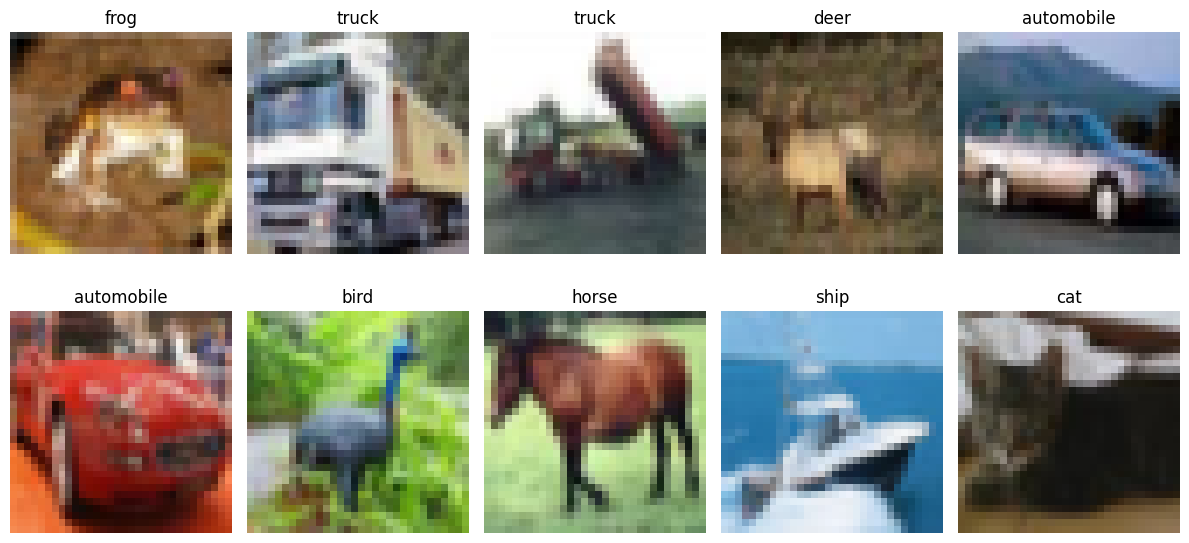

In [19]:
# Visualiser quelques images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()